# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


In [36]:
df

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097592
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023
...,...
2023-09-30,170.984741
2023-10-31,170.545319
2023-11-30,189.949997


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [37]:
# Difference in stock price
df['Diff'] = df['Adj Close'].diff().shift(-1)

# Target up or down
df['Target']  = np.sign(df['Diff'])

# Option Premium
df['Premium'] = 0.08*df['Adj Close']
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097592,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, build a LogReg on column 2

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [39]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [40]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [41]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

In [42]:
df

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097592,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246
2023-06-30,193.453552,2.473404,1.0,15.476284
2023-07-31,195.926956,-8.304138,-1.0,15.674156


# 4.) Add columns, prediction and profits.

In [43]:
df['Predictions'] = y_pred

In [44]:
df['Profits'] = 0.

# True positives
df.loc[(df['Predictions'] == 1) & (df['Target'] == 1), 'Profits'] = df['Premium']

# False positives
df.loc[(df['Predictions'] == 1) & (df['Target'] == -1), 'Profits'] = 100*df['Diff'] + df['Premium']

In [45]:
df

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097592,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0,14.142246
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0,15.476284
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

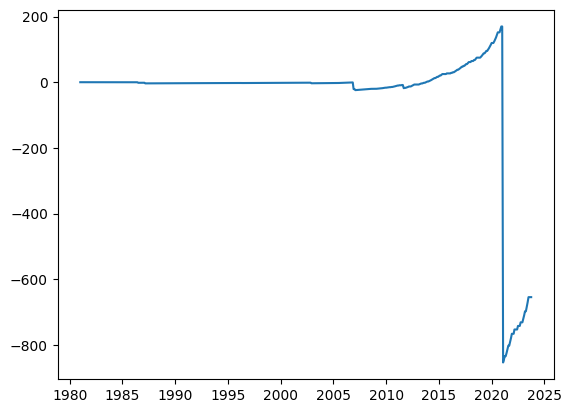

In [46]:
plt.plot(np.cumsum(df['Profits']))
plt.show()

# 5.5.) How you see your skills from the MQE to help Mr.Lius ventures

My academic journey in the MQE program at UCLA, combined with my hands-on internship experiences, has endowed me with a robust skill set in data analytics and a deep understanding of statistical and financial modeling, particularly within the economics and finance domain. My ability that is directly applicable to the strategic analysis and growth initiatives at Philip Liu's company and platform. My proficiency in machine learning and data science enable me to contribute to the intelligent system developments and the enhancement of platform. These competencies are essential in propelling data-centric strategies and innovation within the fast-evolving industry. My approach is to leverage this expertise to support the company's commitment to leading-edge solutions and to contribute to its trends of transformative growth.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.